In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
# Replace 'example.db' with your database file
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Query the database and load the data into a DataFrame
query = "SELECT * FROM Event"  # Replace table_name with your table
df = pd.read_sql_query(query, connection)
print(df.to_string())

# Close the connection
connection.close()



          id            songId      timestamp  playTime
0          1       rbBbQ-jldvQ  1683257493946    170950
1          2       rbBbQ-jldvQ  1683257706634     87147
2          3       Pr3g9TPPuH4  1683257963584    256949
3          4       t2TKqJ2FXGM  1683258177324    213723
4          5       8kvb-pJEeEI  1683258328928    151593
5          6       d1QltB3m0Hs  1683258514104    185169
6          7       2G9_5ZQYXVY  1683258757422    243310
7          8       i5_asj1BGFs  1683258974522    217092
8          9       jg51kFe7CWU  1683259219507    244971
9         10       6A3PMQA5c74  1683259461126    241619
10        11       yoP2rau4sJM  1683259718448    257321
11        12       rbBbQ-jldvQ  1683259850640    132192
12        13       wdo_ATH_ITg  1683260125065    273817
13        14       ZtEtKXhhtS4  1683260168873     43811
14        15       rbBbQ-jldvQ  1683260435272    236328
15        16       Pr3g9TPPuH4  1683260692160    256885
16        17       t2TKqJ2FXGM  1683260905939   

In [9]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Get the list of all tables
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, connection)

# Iterate through each table and print its contents
for table_name in tables['name']:
    print(f"Contents of table: {table_name}")
    table_data = pd.read_sql_query(f"SELECT * FROM {table_name};", connection)
    print(table_data)
    print("-" * 40)

# Close the connection
connection.close()



Contents of table: android_metadata
  locale
0  en_US
----------------------------------------
Contents of table: Song
               id                               title    artistsText  \
0     rbBbQ-jldvQ                       Back To Black  Amy Winehouse   
1     Pr3g9TPPuH4                You Know I'm No Good  Amy Winehouse   
2     t2TKqJ2FXGM                               Rehab  Amy Winehouse   
3     8kvb-pJEeEI                       Me & Mr Jones  Amy Winehouse   
4     d1QltB3m0Hs              Tears Dry On Their Own  Amy Winehouse   
...           ...                                 ...            ...   
9989  k63KZROKk1w         e:HARDSTONE NATIONAL ANTHEM    Don Toliver   
9990  mfRIXW9drHo                     e:ROCKSTAR GIRL    Don Toliver   
9991  YDLGZCmO6us                    e:LOVE IS A DRUG    Don Toliver   
9992  BTyzwZEVJe8  e:DONNY DARKO (feat. Lil Uzi Vert)    Don Toliver   
9993  jbgsyvuXfxU            e:GEEKED UP (feat. Yeat)    Don Toliver   

     durationTex

                                          album_title  total_play_time_ms  \
0                                   Late Registration           386546849   
1                                 The College Dropout           364841573   
2                   My Beautiful Dark Twisted Fantasy           267367197   
3                                            Aquemini           249926648   
4                                          Graduation           240723392   
5                        The Score (Expanded Edition)           238304439   
6                                   The Life Of Pablo           237972844   
7   Born To Die - The Paradise Edition (Special Ve...           228818690   
8                                              Yeezus           210934299   
9                                   808s & Heartbreak           208397528   
10                    The Miseducation of Lauryn Hill           173180352   
11                                   SCARING THE HOES           172520642   

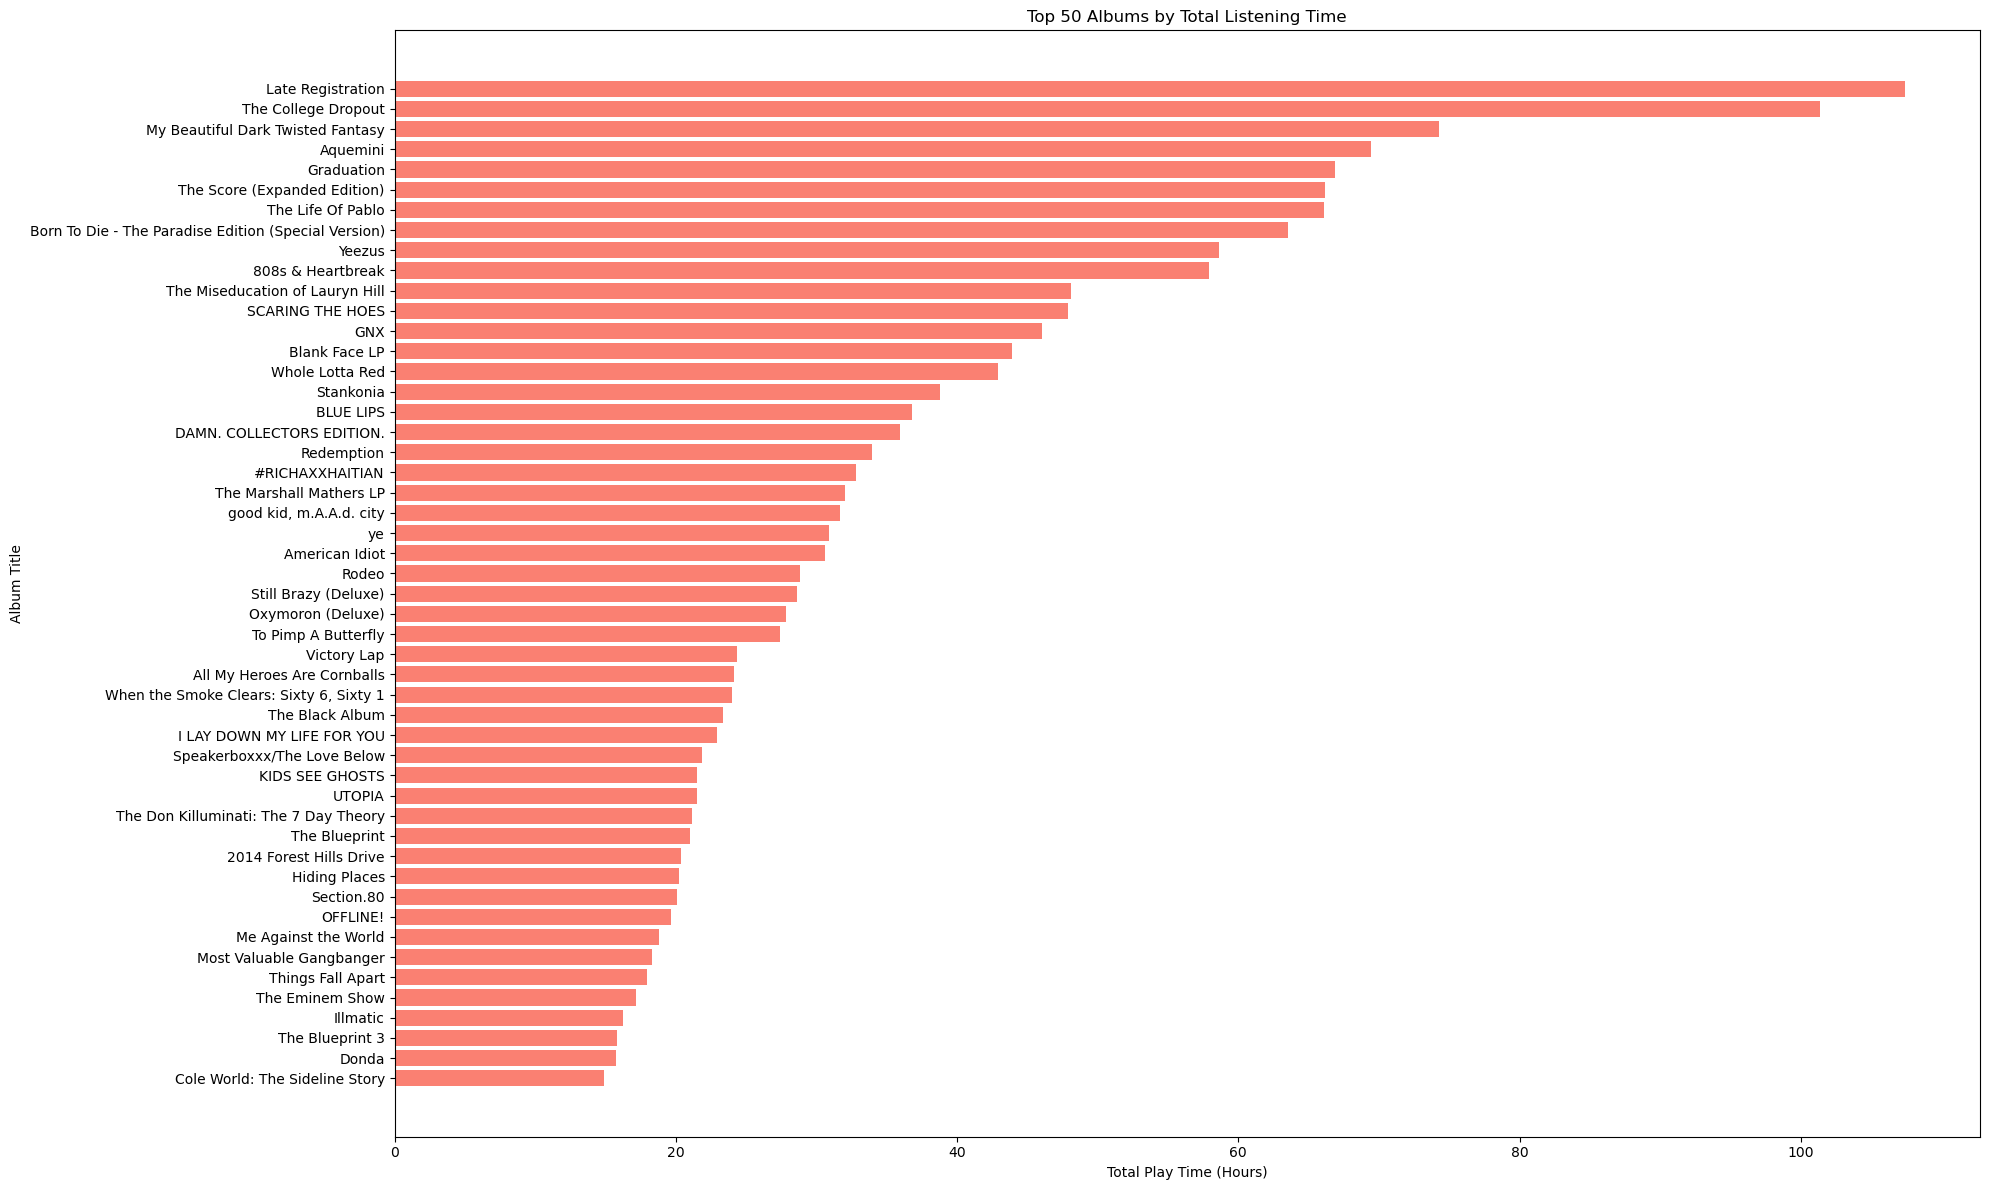

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Query the data to get album total listening time
query_time = """
SELECT
    Album.title AS album_title,
    SUM(Event.playTime) AS total_play_time_ms
FROM
    Event
JOIN
    Song ON Event.songId = Song.id
JOIN
    SongAlbumMap ON Song.id = SongAlbumMap.songId
JOIN
    Album ON SongAlbumMap.albumId = Album.id
GROUP BY
    Album.id
ORDER BY
    total_play_time_ms DESC
LIMIT 50;
"""

# Execute the query and fetch the results into a DataFrame
df_time = pd.read_sql_query(query_time, connection)

# Close the database connection
connection.close()

# Convert time from milliseconds to hours for easier readability
df_time['total_play_time_hours'] = df_time['total_play_time_ms'] / (1000 * 60 * 60)

# Plot the data
plt.figure(figsize=(20, 12))
plt.barh(df_time['album_title'], df_time['total_play_time_hours'], color='salmon')
plt.xlabel("Total Play Time (Hours)")
plt.ylabel("Album Title")
plt.title("Top 50 Albums by Total Listening Time")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.tight_layout()
plt.show()

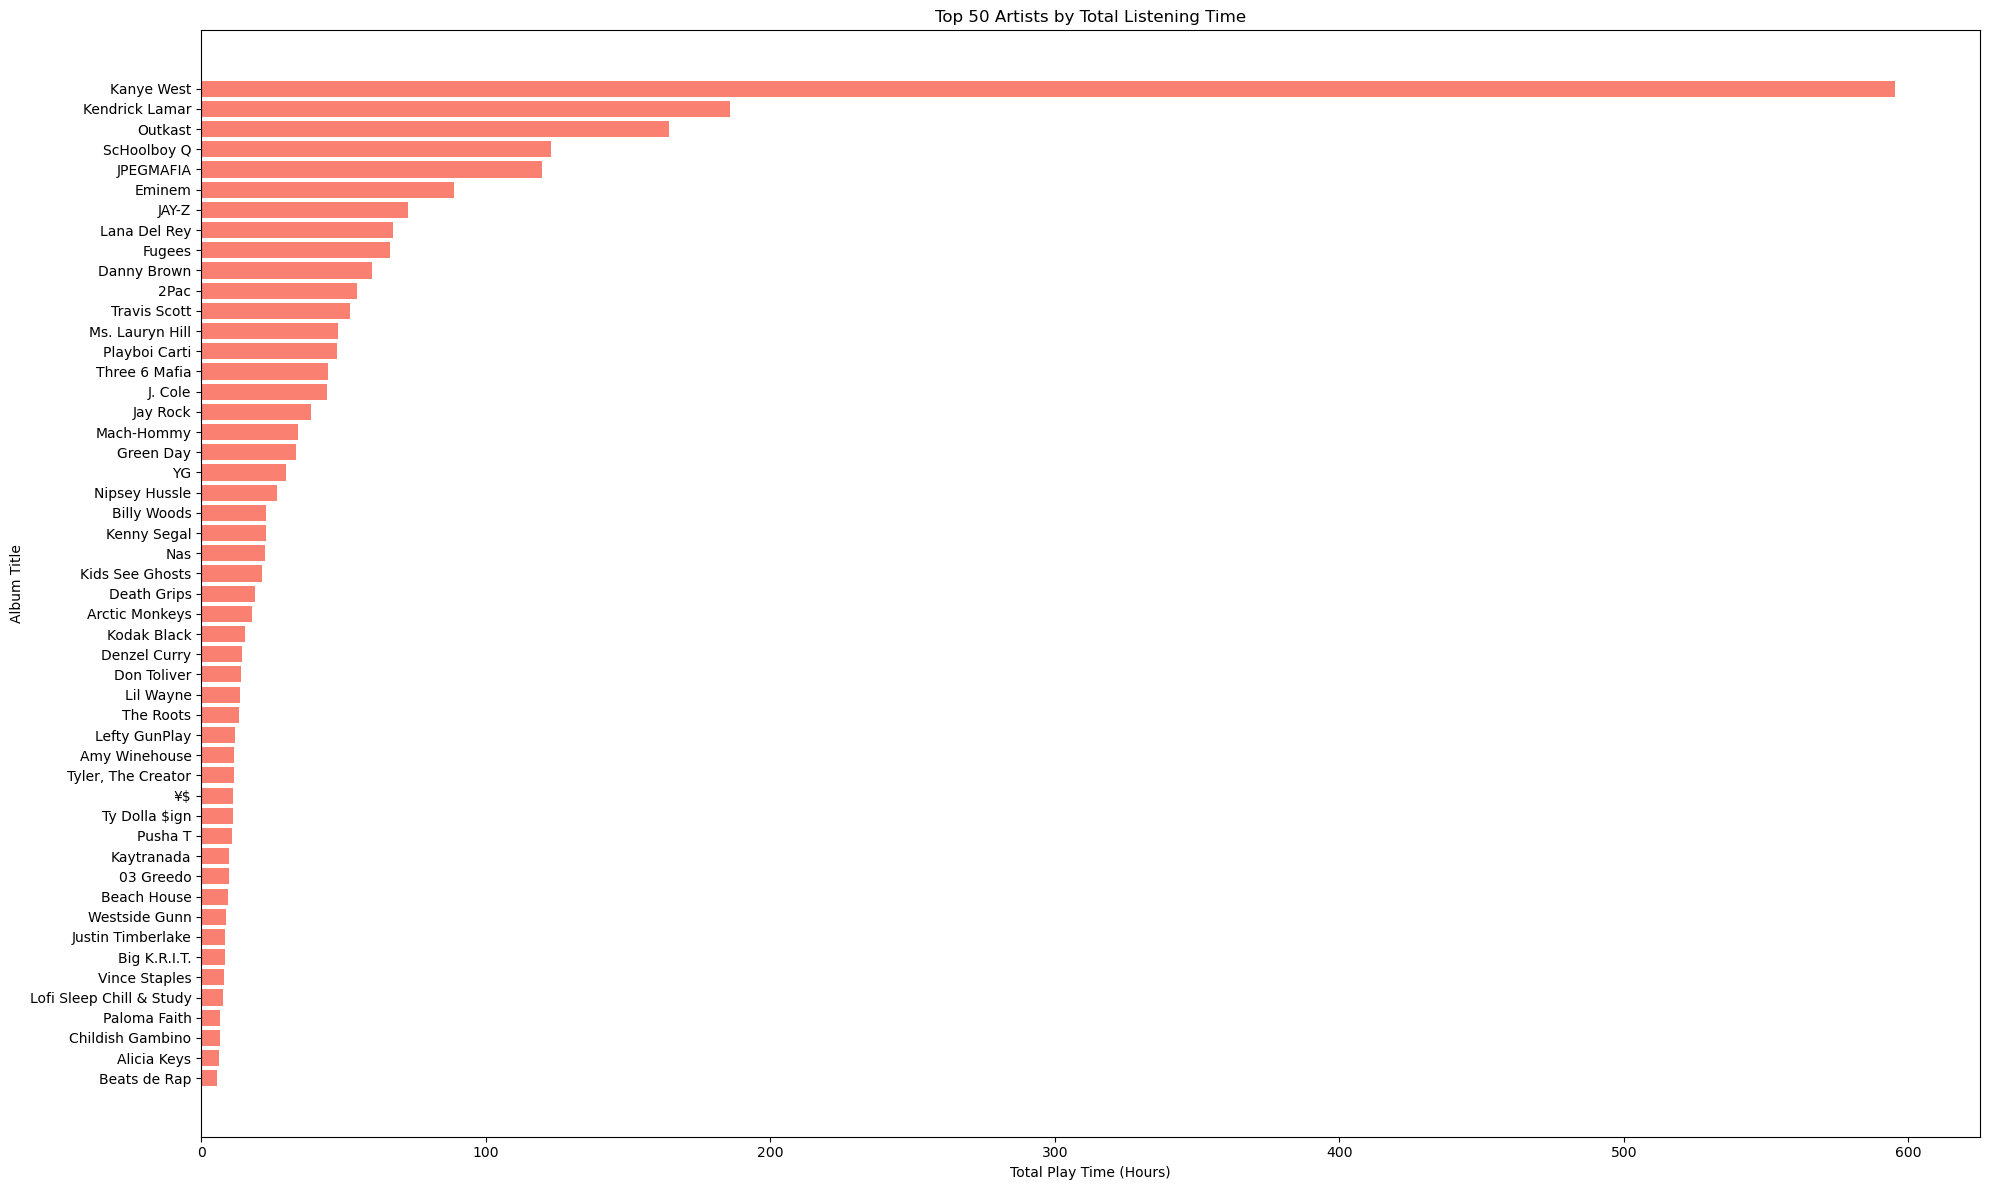

In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Query the data to get album total listening time
query_time = """
SELECT
    Artist.name AS artist_name,
    SUM(Event.playTime) AS total_play_time_ms
FROM
    Event
JOIN
    Song ON Event.songId = Song.id
JOIN
    SongArtistMap ON Song.id = SongArtistMap.songId
JOIN
    Artist ON SongArtistMap.artistId = Artist.id
GROUP BY
    Artist.id
ORDER BY
    total_play_time_ms DESC
LIMIT 50;
"""

# Execute the query and fetch the results into a DataFrame
df_time = pd.read_sql_query(query_time, connection)

# Close the database connection
connection.close()

# Convert time from milliseconds to hours for easier readability
df_time['total_play_time_hours'] = df_time['total_play_time_ms'] / (1000 * 60 * 60)

# Plot the data
plt.figure(figsize=(20, 12))
plt.barh(df_time['artist_name'], df_time['total_play_time_hours'], color='salmon')
plt.xlabel("Total Play Time (Hours)")
plt.ylabel("Album Title")
plt.title("Top 50 Artists by Total Listening Time")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.tight_layout()
plt.savefig('../out/top50ArtistsAllTime.png')
plt.show()

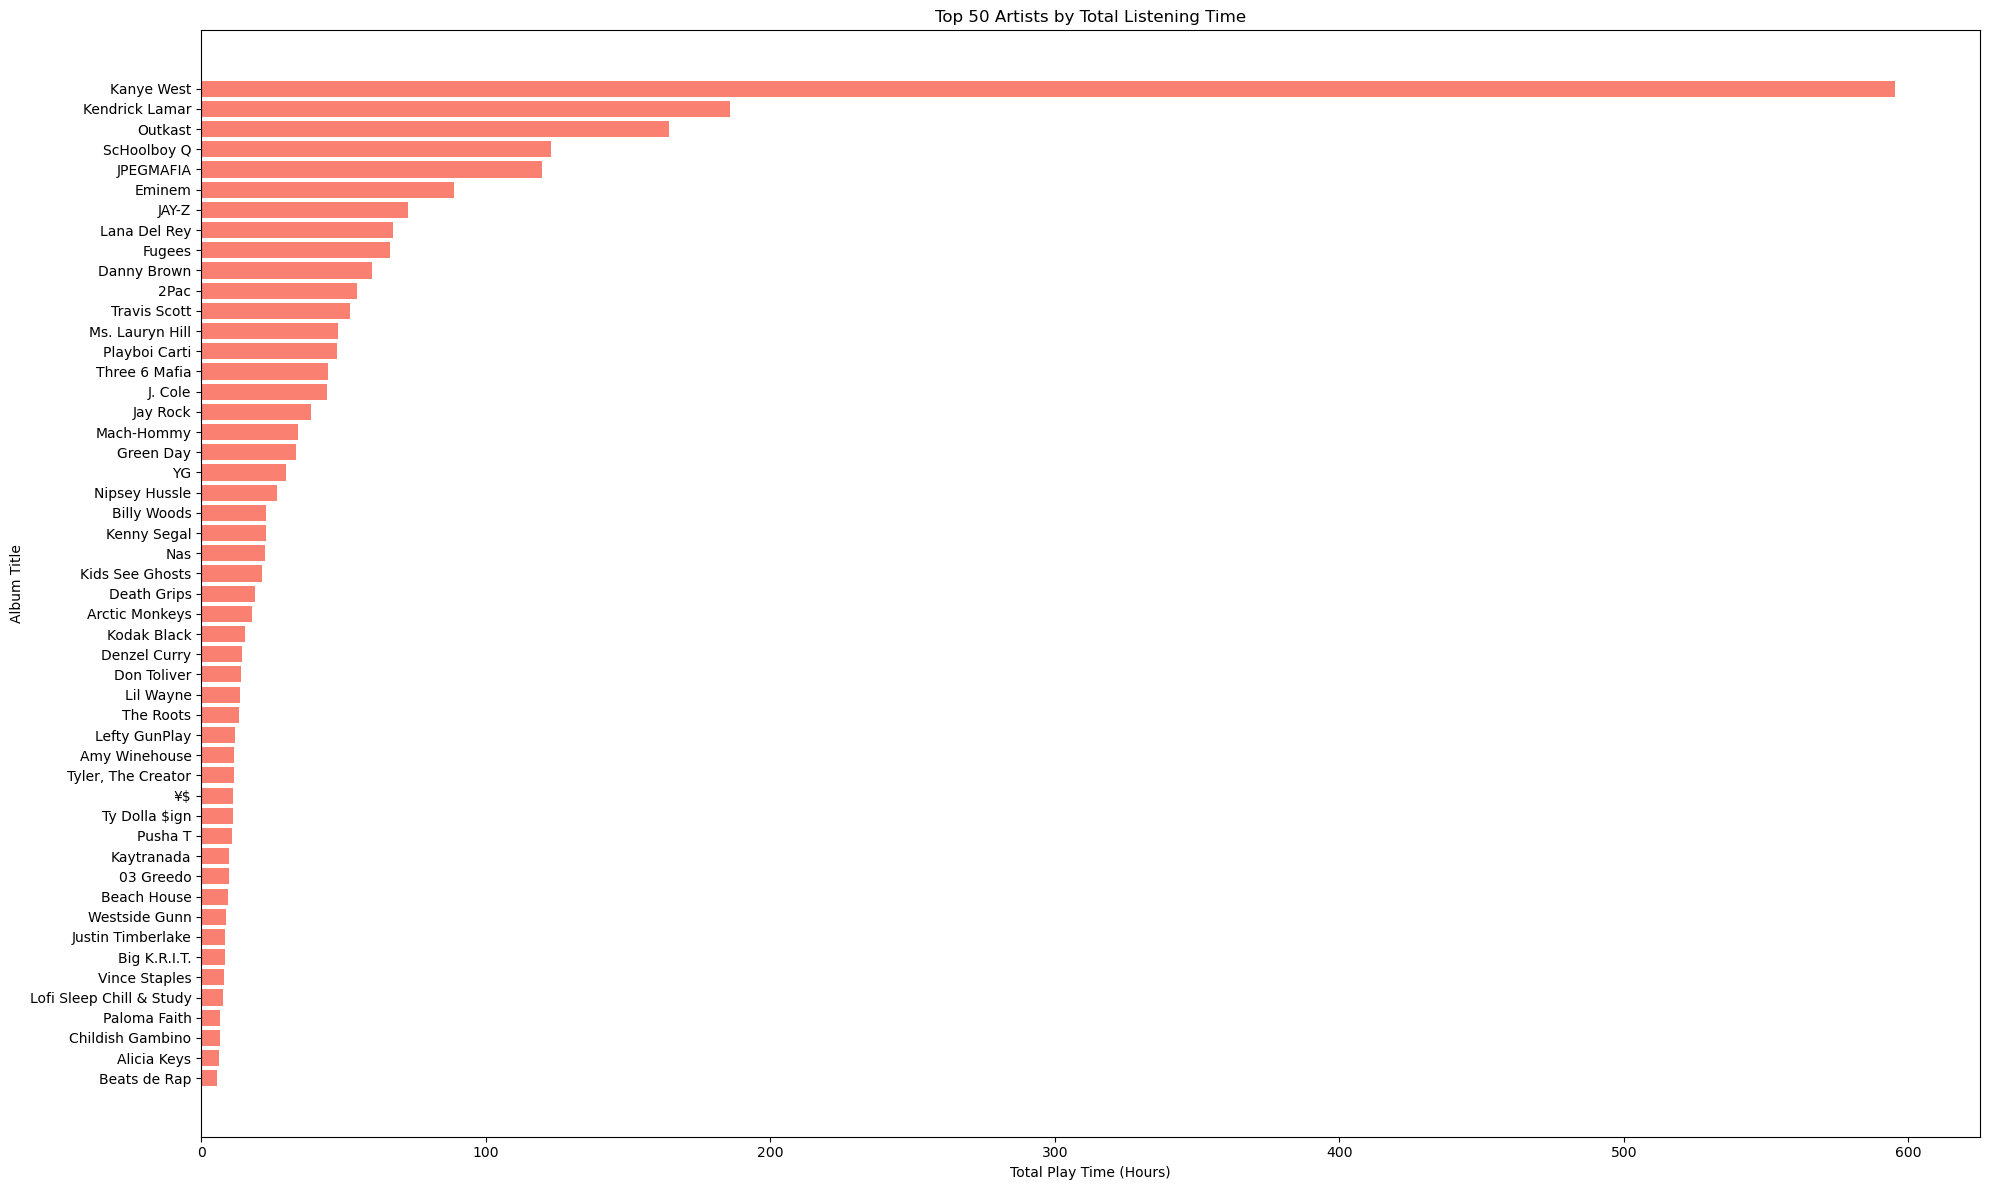

In [40]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Query the data to get album total listening time
query_time = """
SELECT
    Artist.name AS artist_name,
    SUM(Event.playTime) AS total_play_time_ms
FROM
    Event
JOIN
    Song ON Event.songId = Song.id
JOIN
    SongArtistMap ON Song.id = SongArtistMap.songId
JOIN
    Artist ON SongArtistMap.artistId = Artist.id
GROUP BY
    Artist.id
ORDER BY
    total_play_time_ms DESC
LIMIT 50;
"""

# Execute the query and fetch the results into a DataFrame
df_time = pd.read_sql_query(query_time, connection)

# Close the database connection
connection.close()

# Convert time from milliseconds to hours for easier readability
df_time['total_play_time_hours'] = df_time['total_play_time_ms'] / (1000 * 60 * 60)

# Plot the data
plt.figure(figsize=(20, 12))
plt.barh(df_time['artist_name'], df_time['total_play_time_hours'], color='salmon')
plt.xlabel("Total Play Time (Hours)")
plt.ylabel("Album Title")
plt.title("Top 50 Artists by Total Listening Time")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.tight_layout()
plt.savefig('../out/top50ArtistsAllTime.png')
plt.show()

In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Query the data to get album total listening time
query_time = """
SELECT
    Artist.name AS artist_name,
    SUM(CASE WHEN Event.timestamp > 1720243858 THEN Event.playTime ELSE 0 END) AS total_play_time_ms
FROM
    Event
JOIN
    Song ON Event.songId = Song.id
JOIN
    SongArtistMap ON Song.id = SongArtistMap.songId
JOIN
    Artist ON SongArtistMap.artistId = Artist.id
GROUP BY
    Artist.id
ORDER BY
    total_play_time_ms DESC
LIMIT 50;
"""
def toHexColor(n):
    out = hex(n)[2:];
    zeros = "";
    for i in range(6-len(out)):
        zeros += "0"
    out = "#" + zeros + out;
    return out
colors = range(50)
colors = [toHexColor(0x0000ff + 0x000100*(x*5)) for x in colors]
print(colors)
# Execute the query and fetch the results into a DataFrame
df_time = pd.read_sql_query(query_time, connection)

# Close the database connection
connection.close()

# Convert time from milliseconds to hours for easier readability
df_time['total_play_time_hours'] = df_time['total_play_time_ms'] / (1000 * 60 * 60)

# Plot the data
plt.figure(figsize=(20, 12))
plt.barh(df_time['artist_name'], df_time['total_play_time_hours'], color=colors)
plt.xlabel("Total Play Time (Hours)")
plt.ylabel("Album Title")
plt.title("Top 50 Artists by Total Listening Time")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.tight_layout()
plt.savefig('../out/top50ArtistsAllTimeBlueGradient.png')
plt.show()

['#0000ff', '#0005ff', '#000aff', '#000fff', '#0014ff', '#0019ff', '#001eff', '#0023ff', '#0028ff', '#002dff', '#0032ff', '#0037ff', '#003cff', '#0041ff', '#0046ff', '#004bff', '#0050ff', '#0055ff', '#005aff', '#005fff', '#0064ff', '#0069ff', '#006eff', '#0073ff', '#0078ff', '#007dff', '#0082ff', '#0087ff', '#008cff', '#0091ff', '#0096ff', '#009bff', '#00a0ff', '#00a5ff', '#00aaff', '#00afff', '#00b4ff', '#00b9ff', '#00beff', '#00c3ff', '#00c8ff', '#00cdff', '#00d2ff', '#00d7ff', '#00dcff', '#00e1ff', '#00e6ff', '#00ebff', '#00f0ff', '#00f5ff']


DatabaseError: Execution failed on sql '
SELECT
    Artist.name AS artist_name,
    SUM(CASE WHEN UNIX_TIMESTAMP(Event.timestamp) > 1720243858 THEN Event.playTime ELSE 0 END) AS total_play_time_ms
FROM
    Event
JOIN
    Song ON Event.songId = Song.id
JOIN
    SongArtistMap ON Song.id = SongArtistMap.songId
JOIN
    Artist ON SongArtistMap.artistId = Artist.id
GROUP BY
    Artist.id
ORDER BY
    total_play_time_ms DESC
LIMIT 50;
': no such function: UNIX_TIMESTAMP

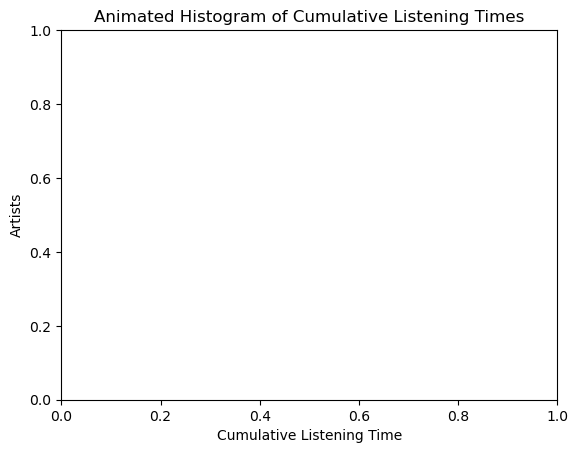

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Connect to the SQLite database
connection = sqlite3.connect('../resources/rimusic_20241229182906.db')

# Query the data to get album total listening time
query_time = """
SELECT
    Artist.name AS artist_name,
    SUM(Event.playTime) AS total_play_time_ms
FROM
    Event
JOIN
    Song ON Event.songId = Song.id
JOIN
    SongArtistMap ON Song.id = SongArtistMap.songId
JOIN
    Artist ON SongArtistMap.artistId = Artist.id
GROUP BY
    Artist.id
ORDER BY
    total_play_time_ms DESC
LIMIT 50;
"""
    
bars = None
# Execute the query and fetch the results into a DataFrame
df_time = pd.read_sql_query(query_time, connection)

# Close the database connection
connection.close()

# Convert time from milliseconds to hours for easier readability
df_time['total_play_time_hours'] = df_time['total_play_time_ms'] / (1000 * 60 * 60)
df_time['cumulative_time'] = 0

connection = sqlite3.connect('../resources/rimusic_20241229182906.db')
query_events = """
SELECT
    Artist.name AS artist_name,
    Event.timestamp AS timestamp,
    Event.playtime AS playtime,
    Event.songId as songId,
    Event.timestamp as timestamp
FROM
    Event
JOIN
    Song ON Event.songId = Song.id
JOIN
    SongArtistMap ON Song.id = SongArtistMap.songId
JOIN
    Artist ON SongArtistMap.artistId = Artist.id
"""

df_events = pd.read_sql_query(query_events, connection)
connection.close()

# Initialization function
def init():
    global bars
    bars = ax.bar(df_time['total_play_time_hours'], df_time["artist_name"], color="blue")
    print(bars)
    return bars

# Update function for animation
def update(frame):
    global bars
    ax.clear()
    current_time = df_events["timestamp"].iloc[frame]
    if df_events["artist_name"].iloc[frame] in df_time["artist_name"]:
        df_time.loc[df_events["artist_name"].iloc[frame], "cumulative_time"] += df_events["playtime"].iloc[frame]
    ax.bar(df_time["artist_name"], df_time["cumulative_time"], color="blue")
    ax.set_title(f"Cumulative Listening Times\nUp to {current_time}")
    ax.set_ylabel("Artists")
    ax.set_xlabel("Cumulative Listening Time")
    ax.set_xlim(0, df_time["cumulative_time"].max() + 10)
    return ax.patches

# Create the animation
fig = plt.figure()
ax = plt.subplot()
ax.set_title("Animated Histogram of Cumulative Listening Times")
ax.set_ylabel("Artists")
ax.set_xlabel("Cumulative Listening Time")

ani = FuncAnimation(fig, update, frames=len(df_events), init_func=init, blit=False)
plt.show()
    